In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
#datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,        
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

In [4]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [13]:
class_name=train_data.classes

In [14]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Image shape:torch.Size([1, 28, 28])


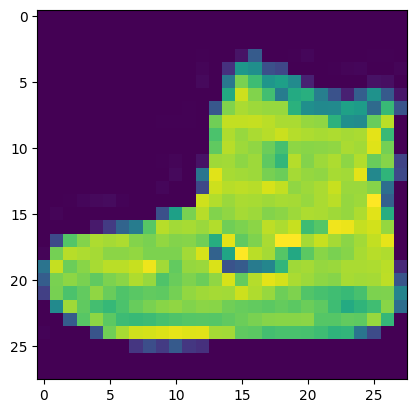

In [18]:
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())

Text(0.5, 1.0, 'Ankle boot')

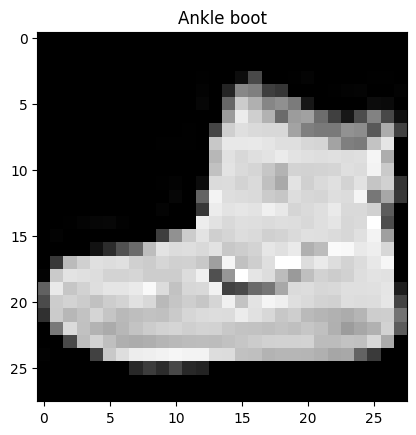

In [19]:
plt.imshow(image.squeeze(),cmap='grey')
plt.title(class_name[label])

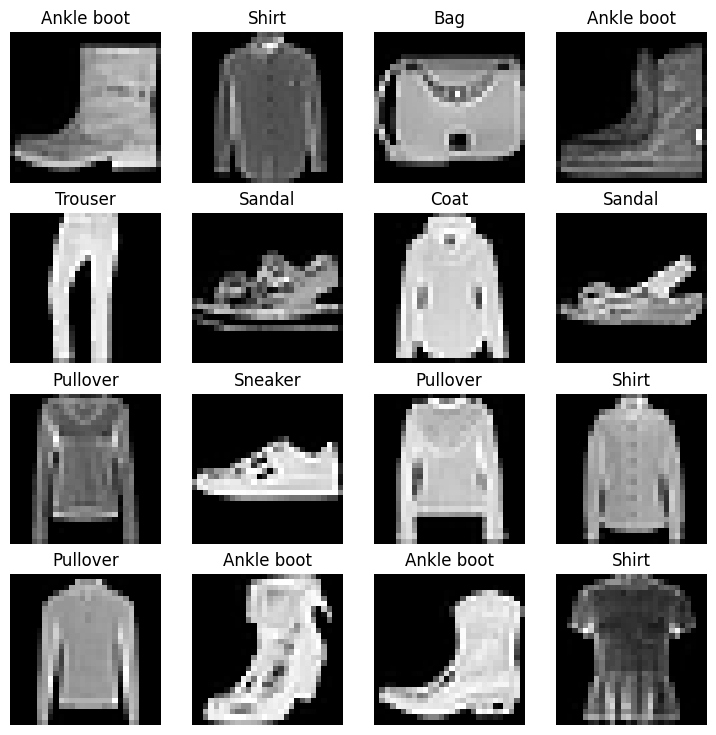

In [21]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_name[label])
    plt.axis(False)



In [25]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataLoader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataLoader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [27]:
len(train_dataLoader)

1875

In [28]:
len(test_dataLoader)

313

In [30]:
train_feature_batch,train_label_batch=next(iter(train_dataLoader))
train_feature_batch.shape,train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
label:6,label_size:torch.Size([])


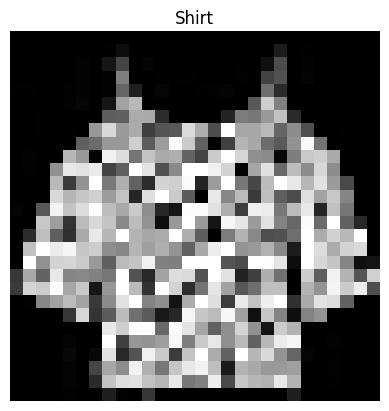

In [34]:
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_feature_batch),size=[1]).item()
img,label=train_feature_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"label:{label},label_size:{label.shape}")

In [35]:
flatten_model=nn.Flatten()
x=train_feature_batch[0]
output=flatten_model(x)
print(f"Before flattening the layer , thwe shape will be:{x.shape}")
print(f"After flattening the layer , thwe shape will be:{output.shape}")

Before flattening the layer , thwe shape will be:torch.Size([1, 28, 28])
After flattening the layer , thwe shape will be:torch.Size([1, 784])


In [37]:
#BUILDING THE MODEL
class FashinMNITS(nn.Module):
    def __init__(self,input_layers:int,hidden_layers:int,output_layers:int):
        super().__init__()
        self.linear_layer=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_layers,out_features=hidden_layers),
            nn.Linear(in_features=hidden_layers,out_features=output_layers)
            )
    def forward(self,x):
        return self.linear_layer(x)

In [40]:
torch.manual_seed(42)
model=FashinMNITS(input_layers=28*28,
                  hidden_layers=10,
                  output_layers=len(class_name)).to("cpu")
model

FashinMNITS(
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [41]:
dummy_torch=torch.rand([1,1,28,28])
model(dummy_torch)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### loss function and optimizer

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01)

In [45]:
def accuracy_function(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))
    return acc

In [43]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("the file exits , just skip")
else:
    requests=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(requests.content)

In [46]:
from helper_function import accuracy_fn
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

In [48]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
    total_time=end-start
    print(f"Train time on {device}:{total_time:3f}seconds")
    return total_time

In [50]:
start=timer()
end=timer()
print_train_time(start,end,device="cpu")

Train time on cpu:0.000019seconds


1.9499999325489625e-05

In [57]:
from tqdm.auto import  tqdm
torch.manual_seed(42)
start_time=timer()

epochs=3

for epoch in range(epochs):
    train_loss=0
    print(f"Epoch:{epoch}\n------")
    for batch,(x,y) in enumerate(train_dataLoader):
        model.train()
        y_pred=model(x)
        #step2 : cacluate the loss
        loss=loss_function(y_pred,y)
        train_loss+=loss #acculate the training loss
        #step3:optimizer
        optimizer.zero_grad()
        #step4: backpropogation
        loss.backward() 
        #step5:optimizer step
        optimizer.step()
        if batch%400==0:
            print(f"looked at {batch*len(x)}/{len(train_dataLoader.dataset)} sample.")
    #divide total train loss by lenght of train dataloader
    train_loss/=len(train_dataLoader)
    ###testting loop
    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for x_test,y_test in test_dataLoader:
            # step1: forward pass
            test_pred=model(x_test)
            #step2:calculate the loss
            test_loss+=loss_function(test_pred,y_test)
            #step3: calculate accuracy
            test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        #calculating the test acc average
        test_acc/=len(test_dataLoader)
#print what happening
    print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f},test acc:{test_acc:.4f}")
#calculating the time
end_time=timer()
time=print_train_time(start=start_time,end=end_time,device=str(next(model.parameters())))
print(f"Time :{time}")

#


Epoch:0
------
looked at 0/60000 sample.
looked at 12800/60000 sample.
looked at 25600/60000 sample.
looked at 38400/60000 sample.
looked at 51200/60000 sample.

Train loss:0.4264 | Test loss:143.0887,test acc:84.0755
Epoch:1
------
looked at 0/60000 sample.
looked at 12800/60000 sample.
looked at 25600/60000 sample.
looked at 38400/60000 sample.
looked at 51200/60000 sample.

Train loss:0.4234 | Test loss:143.8716,test acc:84.2053
Epoch:2
------
looked at 0/60000 sample.
looked at 12800/60000 sample.
looked at 25600/60000 sample.
looked at 38400/60000 sample.
looked at 51200/60000 sample.

Train loss:0.4197 | Test loss:144.7980,test acc:83.9157
Train time on Parameter containing:
tensor([[ 0.0273,  0.0303, -0.0011,  ...,  0.0538,  0.0220,  0.0238],
        [-0.0192, -0.0360,  0.0097,  ...,  0.0531,  0.0263,  0.0111],
        [-0.0009,  0.0022, -0.0002,  ...,  0.0247, -0.0167,  0.0114],
        ...,
        [-0.0114,  0.0279, -0.0269,  ...,  0.0857,  0.0659,  0.0023],
        [-0.0233,

In [55]:
next(model.parameters()).device

device(type='cpu')

### make prediction 

In [65]:
torch.manual_seed(42)

def model_eval(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func,
               accuracy_fnc):
    total_loss, total_acc = 0.0, 0.0
    model.eval()
    with torch.inference_mode():
        for x, y in tqdm(data_loader):
            y_pred = model(x)
            loss = loss_func(y_pred, y)
            total_loss += loss.item()  # convert tensor to scalar
            preds = y_pred.argmax(dim=1)
            total_acc += accuracy_fnc(y_true=y, y_pred=preds)
    avg_loss = total_loss / len(data_loader)
    avg_acc = total_acc / len(data_loader)
    return {"model_name":model.__class__.__name__,
            "model_loss":avg_loss,
            "model_acc":avg_acc}

In [66]:
model_results=model_eval(model=model,
                         data_loader=test_dataLoader,
                         loss_func=loss_function,
                         accuracy_fnc=accuracy_fn)
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashinMNITS',
 'model_loss': 0.46261332941036254,
 'model_acc': 83.91573482428115}

In [68]:
device="cuda"if torch.cuda.is_available() else "cpu"
device

'cuda'

In [87]:
#BUILDING THE MODEL
class FashinMNITSV2(nn.Module):
    def __init__(self, input_layers: int, hidden_layers: int, output_layers: int):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_layers, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=output_layers)
        )
    
    def forward(self, x):
        return self.linear_layer(x)

In [88]:
model_1=FashinMNITSV2(input_layers=784,
                      hidden_layers=100,
                      output_layers=len(class_name)).to(device)

In [89]:
next(model_1.parameters()).to(device)

Parameter containing:
tensor([[-0.0078,  0.0072, -0.0174,  ..., -0.0354,  0.0187,  0.0085],
        [-0.0182,  0.0344, -0.0162,  ...,  0.0017,  0.0045,  0.0133],
        [-0.0108, -0.0213,  0.0084,  ...,  0.0273, -0.0081,  0.0026],
        ...,
        [ 0.0201,  0.0226, -0.0012,  ..., -0.0083, -0.0017, -0.0152],
        [-0.0104, -0.0231,  0.0264,  ...,  0.0239, -0.0202, -0.0322],
        [ 0.0056,  0.0144, -0.0346,  ...,  0.0253,  0.0273,  0.0038]],
       device='cuda:0', requires_grad=True)

In [90]:
from helper_function import accuracy_fn
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [91]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_func:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    model.train()
    train_loss,train_acc=0,0
    for batch,(x,y) in enumerate(data_loader):
        x,y=x.to(device),y.to(device)
        
        y_pred=model(x)
        #step2 : cacluate the loss
        loss=loss_function(y_pred,y)
        train_loss+=loss #acculate the training loss
        train_acc+=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        #step3:optimizer
        optimizer.zero_grad()
        #step4: backpropogation
        loss.backward() 
        #step5:optimizer step
        optimizer.step()
       
    #divide total train loss by lenght of train dataloader
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"train_loss:{train_loss:.4f} | Train acc:{train_acc:4f}")
    
    

In [92]:
def test_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_func:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
    """performing the testinig loop"""
    test_acc,test_loss=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y=X.to(device),y.to(device)
            #step1:forward pass
            test_pred=model(X)
            #calculate the loss
            test_loss+=loss_func(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
        #adjust the matrix
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f"Test loss:{test_loss:5f}|test acc:{test_acc:5f}")
        


In [93]:
torch.manual_seed(42)
from timeit import default_timer as Timer
start_time=timer()
epochs=3
#create a optimizer  loop  annd evaluation loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch :{epoch}\n----")
    train_step(model=model_1,
               data_loader=train_dataLoader,
               loss_func=loss_function,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device
               )
    test_step(model=model_1,
              data_loader=test_dataLoader,
              loss_func=loss_function,
              accuracy_fn=accuracy_fn,
              device=device)
end_time=timer()
total_time=print_train_time(start=start_time,end=end_time,
                            device=device)
total_time

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0
----
train_loss:0.6504 | Train acc:75.868333
Test loss:0.478249|test acc:82.517971
Epoch :1
----
train_loss:0.4200 | Train acc:84.523333
Test loss:0.448906|test acc:83.775958
Epoch :2
----
train_loss:0.3743 | Train acc:86.201667
Test loss:0.393691|test acc:85.782748
Train time on cuda:98.958077seconds


98.95807659999991